# Imports

In [25]:
import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras.callbacks import Callback
from tensorflow.keras.models import Sequential
from tensorflow.keras import regularizers
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D,GlobalAveragePooling2D, Concatenate, Reshape,GlobalMaxPooling2D, Activation, Input
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from classification_models.tfkeras import Classifiers
from PIL import Image
import numpy as np
import pandas
import os
import pathlib
import datetime
import math
import sys
import optuna
import neptune
import matplotlib.pyplot as plt



# Dataset plots

In [3]:
labels = !cat labelsCounts.txt

labelCount = [i.strip().split(" ") for i in labels]

x = [(i[1]) for i in labelCount]
y = [int(i[0]) for i in labelCount]

ValueError: invalid literal for int() with base 10: 'cat:'

## Boxplot for dataset analyse

In [ ]:
plt.rcParams['figure.figsize'] = [7.2,2.45] 
#plt.stem(x,y,use_line_collection=True)
plt.boxplot(y,vert=False)
#plt.ylabel('some numbers')
#plt.ylim((0,2))
plt.yticks(rotation=0)
#plt.savefig('rapport/images/labelDist.svg')
plt.show()



In [ ]:
plt.rcParams['figure.figsize'] = [7.2,7.45] 
#plt.stem(x,y,use_line_collection=True)
plt.table(x,y)
#plt.ylabel('some numbers')
#plt.ylim((0,2))
plt.yticks(rotation=0)
plt.savefig('rapport/images/labelDist.svg')
plt.show()

In [ ]:
#sum(y)/len(y)
min(y)


#Model Plots

In [8]:
key = "eyJhcGlfYWRkcmVzcyI6Imh0dHBzOi8vdWkubmVwdHVuZS5haSIsImFwaV91cmwiOiJodHRwczovL3VpLm5lcHR1bmUuYWkiLCJhcGlfa2V5IjoiOWUxN2YwMTUtNjM1Ny00NmVlLWIzOTctNzAwYTllMGNmMTg2In0="
project = neptune.init('lassegoransson/xrayPredictor',api_token=key)
exp = project.get_experiments("XRAY-155")[0]

In [15]:
df = exp.get_numeric_channels_values('loss','val_loss')


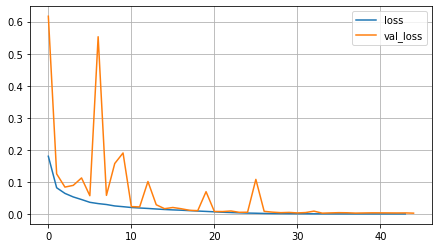

In [31]:
plt.rcParams['figure.figsize'] = [7.2,4] 
ax = plt.gca()

df.plot(kind='line',y='loss',ax=ax)
df.plot(kind='line',y='val_loss',ax=ax)
plt.grid()